In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import matplotlib.pyplot as plt
import math
import seaborn as sns
import time 


In [1]:
#loading the data.
df=pd.read_csv('../input/pune-air-quality-index/PNQ_AQI.csv')
df.head()

NameError: name 'pd' is not defined

In [ ]:
df.info()

In [ ]:
#the co2 column is empty ,so lets drop that.
df.drop('CO2 µg/m3',axis=1,inplace=True)
#making the date column a datetime datatype.
df['Date']=pd.to_datetime(df['Date'])

In [6]:
#there are only 6 locations ,but have been represented by diffrent names.Lets replace them.
rep={'MPCB-KR':'Karve Road','MPCB-SWGT':'Swargate','MPCB-BSRI':'Bhosari','MPCB-NS':'Nal Stop','MPCB-PMPR':'Pimpri','Pimpri Chinchwad':'Chinchwad'}

df['Location'].replace(rep,inplace=True)

In [7]:
#now as we have some missing values ,lets fill them.
#we will use ffill (forward fill ) and bfill() to fill empty values by the values that occur
#after or before missing value.
df.sort_values(by='Date',inplace=True)
df=df.ffill().bfill()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7844 entries, 0 to 6947
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        7844 non-null   datetime64[ns]
 1   SO2 µg/m3   7844 non-null   object        
 2   Nox µg/m3   7844 non-null   object        
 3   RSPM µg/m3  7844 non-null   float64       
 4   SPM         7844 non-null   float64       
 5   AQI         7844 non-null   float64       
 6   Location    7844 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 490.2+ KB


In [8]:
#SO2 and NOx column have dtype object,converting them to float.
df['SO2 µg/m3']=pd.to_numeric(df['SO2 µg/m3'],errors='coerce')
df['SO2 µg/m3']=df['SO2 µg/m3'].ffill().bfill()


df['Nox µg/m3']=pd.to_numeric(df['Nox µg/m3'],errors='coerce')
df['Nox µg/m3']=df['Nox µg/m3'].ffill().bfill()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7844 entries, 0 to 6947
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        7844 non-null   datetime64[ns]
 1   SO2 µg/m3   7844 non-null   float64       
 2   Nox µg/m3   7844 non-null   float64       
 3   RSPM µg/m3  7844 non-null   float64       
 4   SPM         7844 non-null   float64       
 5   AQI         7844 non-null   float64       
 6   Location    7844 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 490.2+ KB


In [9]:
#lets add a new feature that represents the WHO rating of AQI according to its values.
df['AQI Rating']=pd.cut(df['AQI'],bins=[0,50,100,150,200,300,df['AQI'].max()]
                        ,labels=['good','moderate','moderately unhealth','unhealthy','very unhealthy','Hazardous'])
df.head()

,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,AQI,Location,AQI Rating
0,2009-01-01,15.0,53.0,179.0,366.0,153.0,Karve Road,unhealthy
1282,2009-01-01,19.0,60.0,161.0,366.0,141.0,Swargate,moderately unhealth
26,2009-01-02,19.0,16.0,140.0,366.0,127.0,Karve Road,moderately unhealth
1618,2009-01-04,26.0,28.0,102.0,261.0,101.0,Bhosari,moderately unhealth
74,2009-01-04,20.0,20.0,150.0,261.0,133.0,Karve Road,moderately unhealth


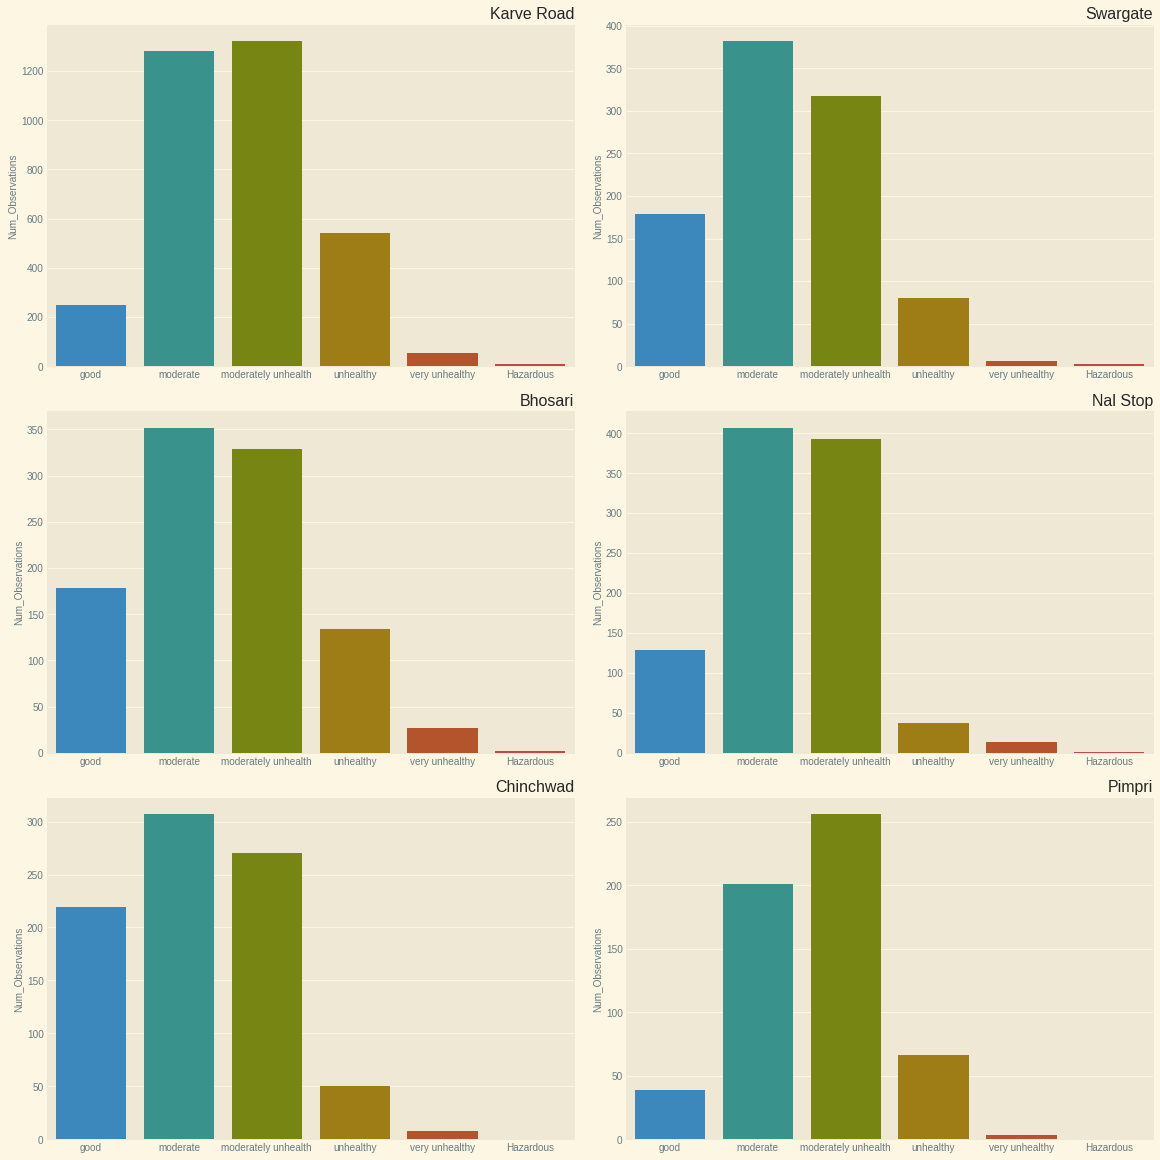

In [16]:
plt.style.use('Solarize_Light2')
plt.rcParams['font.size'] = 10
locations = [x for x in df['Location'].unique()]
fig, ax = plt.subplots(3, 2, figsize=(16, 16), constrained_layout=True)
n = 0
for i in range(3):
    for j in range(2):
        sns.barplot(x=df[df['Location'] == locations[n]]['AQI Rating'].value_counts().index,
                    y=df[df['Location'] == locations[n]]['AQI Rating'].value_counts().values,
                    ax=ax[i, j])
        ax[i, j].set_title(locations[n], y=1, loc='right')
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel('Num_Observations', size=10)
        n += 1
plt.show()


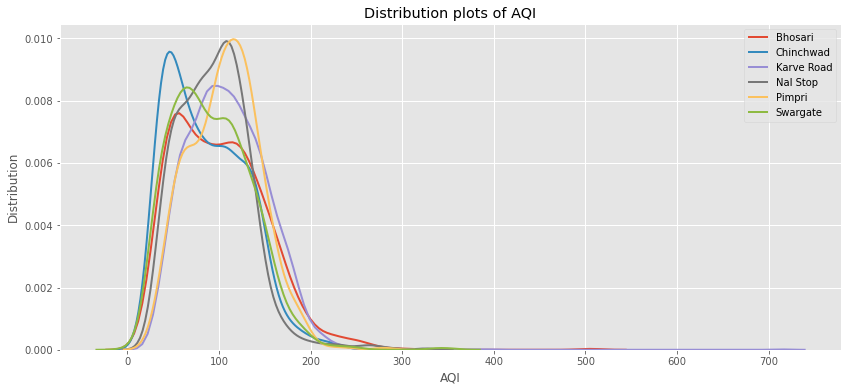

In [11]:
#lets see the distribution of AQI
plt.style.use('ggplot')
fig,ax=plt.subplots(figsize=(14,6))
for key,grp in df.groupby('Location'):
    sns.distplot(grp['AQI'],label=key,hist=False,ax=ax)
plt.title('Distribution plots of AQI')
plt.xlabel('AQI')
plt.ylabel('Distribution')
plt.legend()


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

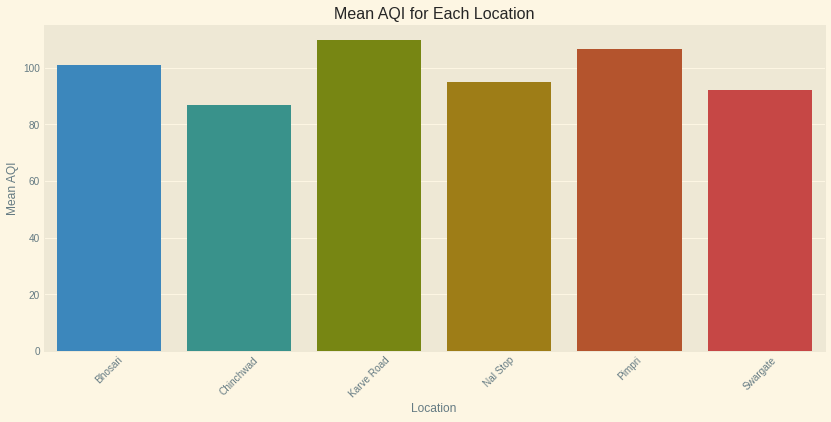

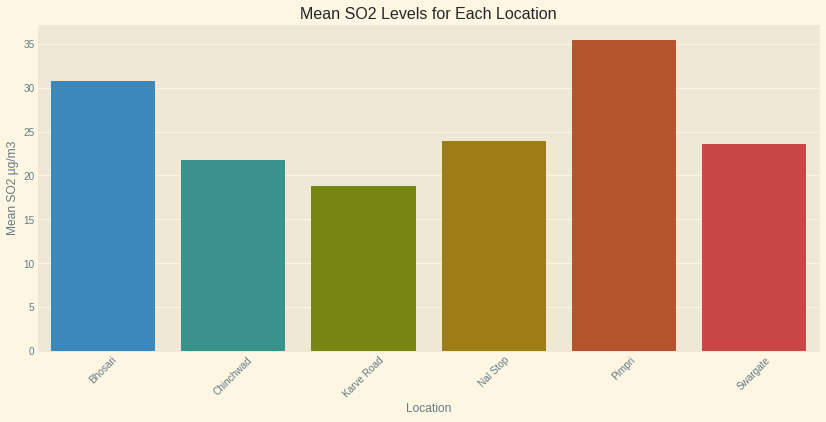

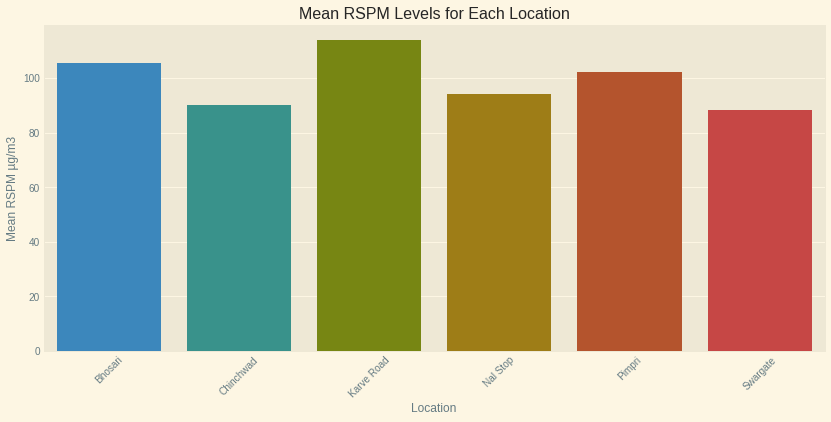

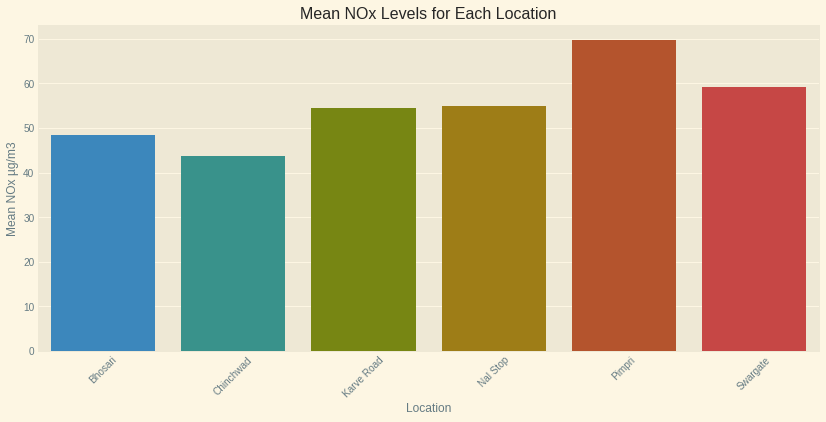

In [17]:
# AQI Distribution
fig, ax = plt.subplots(figsize=(14, 6))
aqi_means = df.groupby('Location')['AQI'].mean()
sns.barplot(x=aqi_means.index, y=aqi_means.values, ax=ax)
plt.title('Mean AQI for Each Location')
plt.xlabel('Location')
plt.ylabel('Mean AQI')
plt.xticks(rotation=45)

# SO2 Distribution
fig, ax = plt.subplots(figsize=(14, 6))
so2_means = df.groupby('Location')['SO2 µg/m3'].mean()
sns.barplot(x=so2_means.index, y=so2_means.values, ax=ax)
plt.title('Mean SO2 Levels for Each Location')
plt.xlabel('Location')
plt.ylabel('Mean SO2 µg/m3')
plt.xticks(rotation=45)

# RSPM Distribution
fig, ax = plt.subplots(figsize=(14, 6))
rspm_means = df.groupby('Location')['RSPM µg/m3'].mean()
sns.barplot(x=rspm_means.index, y=rspm_means.values, ax=ax)
plt.title('Mean RSPM Levels for Each Location')
plt.xlabel('Location')
plt.ylabel('Mean RSPM µg/m3')
plt.xticks(rotation=45)

# NOx Distribution
fig, ax = plt.subplots(figsize=(14, 6))
nox_means = df.groupby('Location')['Nox µg/m3'].mean()
sns.barplot(x=nox_means.index, y=nox_means.values, ax=ax)
plt.title('Mean NOx Levels for Each Location')
plt.xlabel('Location')
plt.ylabel('Mean NOx µg/m3')
plt.xticks(rotation=45)


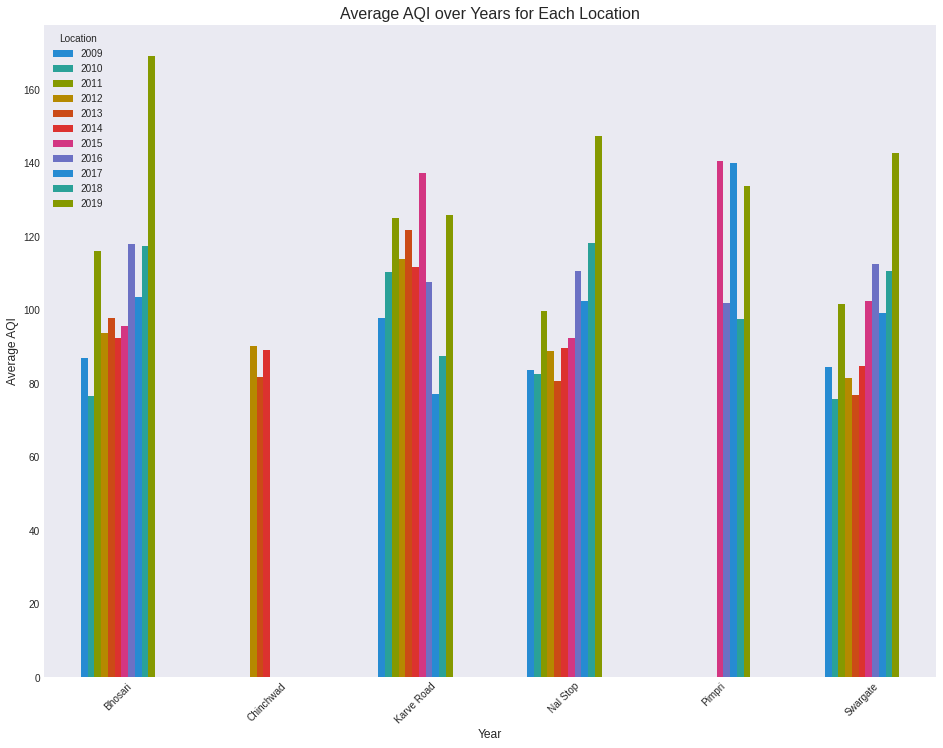

In [18]:
plt.style.use('seaborn-dark')
fig, ax = plt.subplots(figsize=(16, 12))
mean_aqi_per_year = df.groupby(['Location', df['Date'].dt.year])['AQI'].mean().unstack()
mean_aqi_per_year.plot(kind='bar', ax=ax)
plt.title('Average AQI over Years for Each Location')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.legend(title='Location')


The plot shows that the worst AQI averaged over the month is almost always falls in month of December.It follows a upward trend in winters ,peaks in December.AQI shows decline after
winter months and reaches the best values in the monsoon months.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

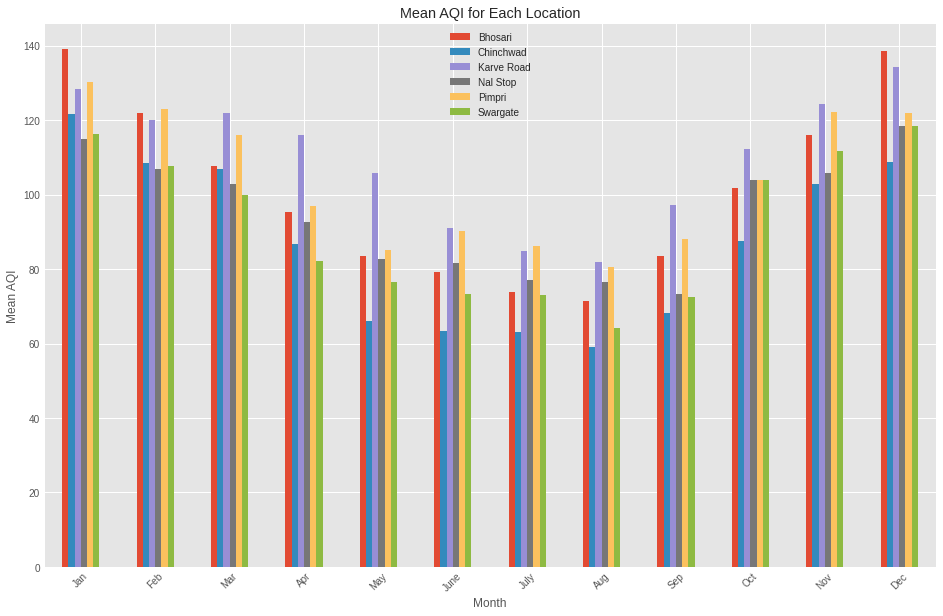

In [19]:
plt.style.use('ggplot')
monthly_avg.plot(kind='bar', figsize=(16, 10))
plt.title('Mean AQI for Each Location')
plt.ylabel('Mean AQI')
plt.xlabel('Month')
plt.xticks(rotation=45)


Text(0.5, 0, 'Month')

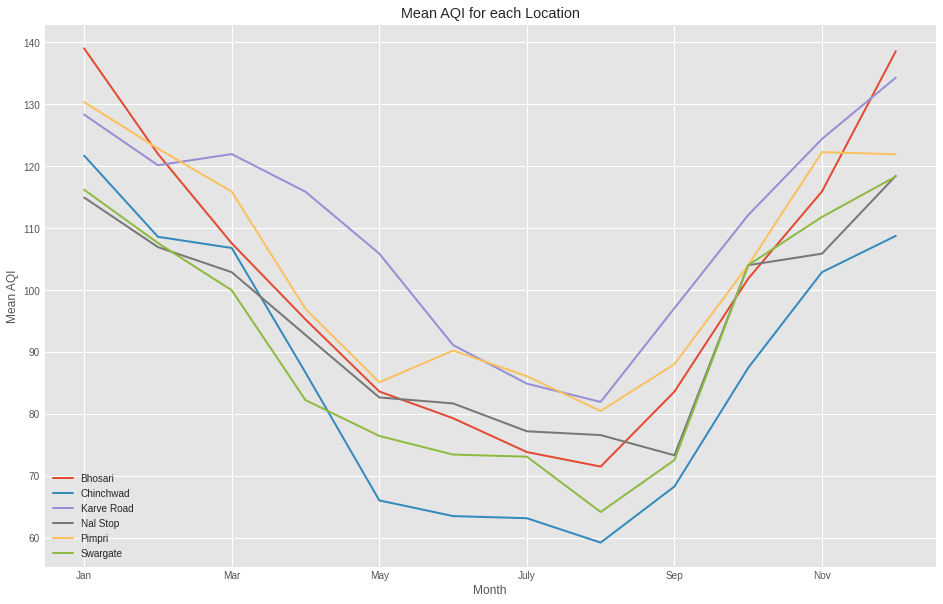

In [15]:
#plotting on the above data 
plt.style.use('ggplot')
monthly_avg.plot(figsize=(16,10))
plt.title('Mean AQI for each Location')
plt.ylabel('Mean AQI')
plt.xlabel('Month')


The plot shows how the values of AQI peak during the winter months,fall during summer months and are lowest in monsoon months. 